In [146]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0);

# Clustering using 2 features (salary, exercised stock options)

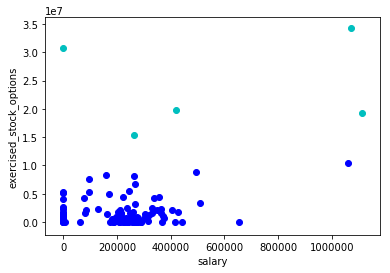

In [147]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred=kmeans.predict(finance_features)

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters1.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

# Clustering using 3 features (+total_payments)

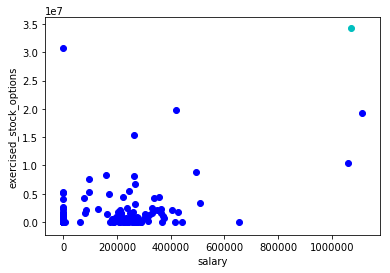

In [19]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = 'total_payments'
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred=kmeans.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

# Get min, max  values (excluding NaN)

In [112]:
stock=[]
for key,value in data_dict.items():
    if value['exercised_stock_options']=='NaN':
        continue
    else:
        stock.append(value['exercised_stock_options'])
min(stock),max(stock)

(3285, 34348384)

In [113]:
sal=[]
for key,value in data_dict.items():
    if value['salary']=='NaN':
        continue
    else:
        sal.append(value['salary'])
min(sal),max(sal)

(477, 1111258)

In [127]:
#After NaN's are replaced with zero, min's are, of course, zero:
import pandas as pd
features_df=pd.DataFrame(finance_features, columns = ['salary','exercised_stock_options','total_payments'])
features_df.describe().ix[['min','max'],].astype('int')

,salary,exercised_stock_options,total_payments
min,0,0,0
max,1111258,34348384,103559793


# Feature Scaling so that features are scaled to be between [0,1] for clustering with two features (using MinMaxScalar)

In [140]:
from sklearn.preprocessing import MinMaxScaler #default range to scale to is [0,1]

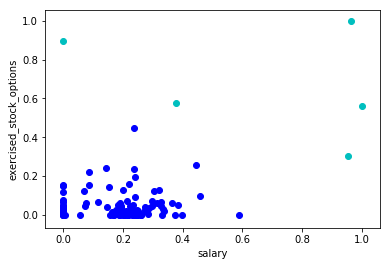

In [144]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )

#transform data to be between [0,1]
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

poi, finance_features = targetFeatureSplit( data )


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred=kmeans.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"